In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

# Rename columns to use with dot notation
df.columns = df.columns.str.rstrip().str.replace(' ','_').str.lower()

In [4]:
cat_columns = ['reason_for_absence','month_of_absence','day_of_the_week','seasons','education','son','pet']
for column in cat_columns:
    df[column] = df[column].astype('category')

bool_columns = ['disciplinary_failure','social_drinker','social_smoker']
for column in bool_columns:
    df[column] = df[column].astype('bool')

In [5]:
df.describe(include='all')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.0,740.0,740.0,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,...,740,740.0,740.0,740,740,740.0,740.000000,740.000000,740.000000,740.000000
unique,NaN,28.0,13.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,4.0,5.0,2,2,6.0,NaN,NaN,NaN,NaN
top,NaN,23.0,3.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,...,False,1.0,0.0,True,False,0.0,NaN,NaN,NaN,NaN
freq,NaN,149.0,87.0,161.0,195.0,NaN,NaN,NaN,NaN,NaN,...,700,611.0,298.0,420,686,460.0,NaN,NaN,NaN,NaN
mean,18.017568,NaN,NaN,NaN,NaN,221.329730,29.631081,12.554054,36.450000,271.490235,...,NaN,NaN,NaN,NaN,NaN,NaN,79.035135,172.114865,26.677027,6.924324
std,11.021247,NaN,NaN,NaN,NaN,66.952223,14.836788,4.384873,6.478772,39.058116,...,NaN,NaN,NaN,NaN,NaN,NaN,12.883211,6.034995,4.285452,13.330998
min,1.000000,NaN,NaN,NaN,NaN,118.000000,5.000000,1.000000,27.000000,205.917000,...,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,163.000000,19.000000,0.000000
25%,9.000000,NaN,NaN,NaN,NaN,179.000000,16.000000,9.000000,31.000000,244.387000,...,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,169.000000,24.000000,2.000000
50%,18.000000,NaN,NaN,NaN,NaN,225.000000,26.000000,13.000000,37.000000,264.249000,...,NaN,NaN,NaN,NaN,NaN,NaN,83.000000,170.000000,25.000000,3.000000
75%,28.000000,NaN,NaN,NaN,NaN,260.000000,50.000000,16.000000,40.000000,294.217000,...,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,172.000000,31.000000,8.000000


In [6]:
# After analysis, columns reason_for_absence and month_of_absence shows min. values as 0 which is to be treated as NaN
# So, we import the dataset again treating the same

df.reason_for_absence.loc[df.reason_for_absence == 0] = np.NaN
df.month_of_absence.loc[df.month_of_absence == 0] = np.NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
id                                 740 non-null int64
reason_for_absence                 697 non-null category
month_of_absence                   737 non-null category
day_of_the_week                    740 non-null category
seasons                            740 non-null category
transportation_expense             740 non-null int64
distance_from_residence_to_work    740 non-null int64
service_time                       740 non-null int64
age                                740 non-null int64
work_load_average/day              740 non-null float64
hit_target                         740 non-null int64
disciplinary_failure               740 non-null bool
education                          740 non-null category
son                                740 non-null category
social_drinker                     740 non-null bool
social_smoker                      740 non-null bool
pet           

In [8]:
# The reason_for_absence and month_of_absence columns shows 43 and 3 NaN values
df.isna().sum()

id                                  0
reason_for_absence                 43
month_of_absence                    3
day_of_the_week                     0
seasons                             0
transportation_expense              0
distance_from_residence_to_work     0
service_time                        0
age                                 0
work_load_average/day               0
hit_target                          0
disciplinary_failure                0
education                           0
son                                 0
social_drinker                      0
social_smoker                       0
pet                                 0
weight                              0
height                              0
body_mass_index                     0
absenteeism_time_in_hours           0
dtype: int64

In [9]:
# For all rows where reason_for_absence is NaN, the absenteeism_time_in_hours is 0, hence we can drop these rows
df[df.reason_for_absence.isna()][['reason_for_absence','absenteeism_time_in_hours']].head()

,reason_for_absence,absenteeism_time_in_hours
1,NaN,0
50,NaN,0
51,NaN,0
54,NaN,0
55,NaN,0


In [10]:
# After dropping the rows where reason_for_absence is NaN, 
# we are still left with 1 row where abseteeism_time_in_hours is 0
# We would impute this with mean value of column in dataframe

df = df.dropna(subset=['reason_for_absence']).reset_index(drop=True)
df[df.absenteeism_time_in_hours == 0]

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
127,34,27,1,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,0


In [24]:
# Impute above row with mean value for reason_for_absence = 27
df.loc[df.absenteeism_time_in_hours == 0,'absenteeism_time_in_hours'] = df[df['reason_for_absence']==27].absenteeism_time_in_hours.mean()

In [67]:
# There are 28 observations which have more than 24 hours as absenteeism_time_in_hours
# Since, each observation is for a day's data it cannot be more than 24 hours
# These could be issues with data and could be dropped
df = df.drop(index = df[df.absenteeism_time_in_hours > 24].index).reset_index(drop=True)

In [68]:
# Below, we see that there are some months which overlap in 2 seasons
# We will merge months into seasons where the count is more
# e.g., Month 6 is in Season 1 (count = 16) and Season 3 (count = 35). 
# Hence, it should be merged in Season 3 (new_count = 51)
# Similarly for other months too
df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        7                   60
         8                   53
         9                   41
2        1                   49
         2                   72
         3                   79
3        4                   50
         5                   56
         6                   49
4        10                  61
         11                  54
         12                  45
Name: id, dtype: int64

In [69]:
df.loc[(df.month_of_absence==6) & (df.seasons==1),'seasons'] = 3
df.loc[(df.month_of_absence==12) & (df.seasons==2),'seasons'] = 4
df.loc[(df.month_of_absence==9) & (df.seasons==4),'seasons'] = 1
df.loc[(df.month_of_absence==3) & (df.seasons==3),'seasons'] = 2

In [70]:
# After making the above changes, the seasons and months are arranged properly
df.groupby(by=['seasons','month_of_absence']).id.count()

seasons  month_of_absence
1        7                   60
         8                   53
         9                   41
2        1                   49
         2                   72
         3                   79
3        4                   50
         5                   56
         6                   49
4        10                  61
         11                  54
         12                  45
Name: id, dtype: int64

In [74]:
df[['work_load_average/day','hit_target','absenteeism_time_in_hours']]

,work_load_average/day,hit_target,absenteeism_time_in_hours
0,239.554,97,4.0
1,239.554,97,2.0
2,239.554,97,4.0
3,239.554,97,2.0
4,239.554,97,2.0
5,239.554,97,8.0
6,239.554,97,4.0
7,239.554,97,8.0
8,239.554,97,8.0
9,239.554,97,8.0


In [82]:
df[df.hit_target < 85]['absenteeism_time_in_hours'].mean()

7.0

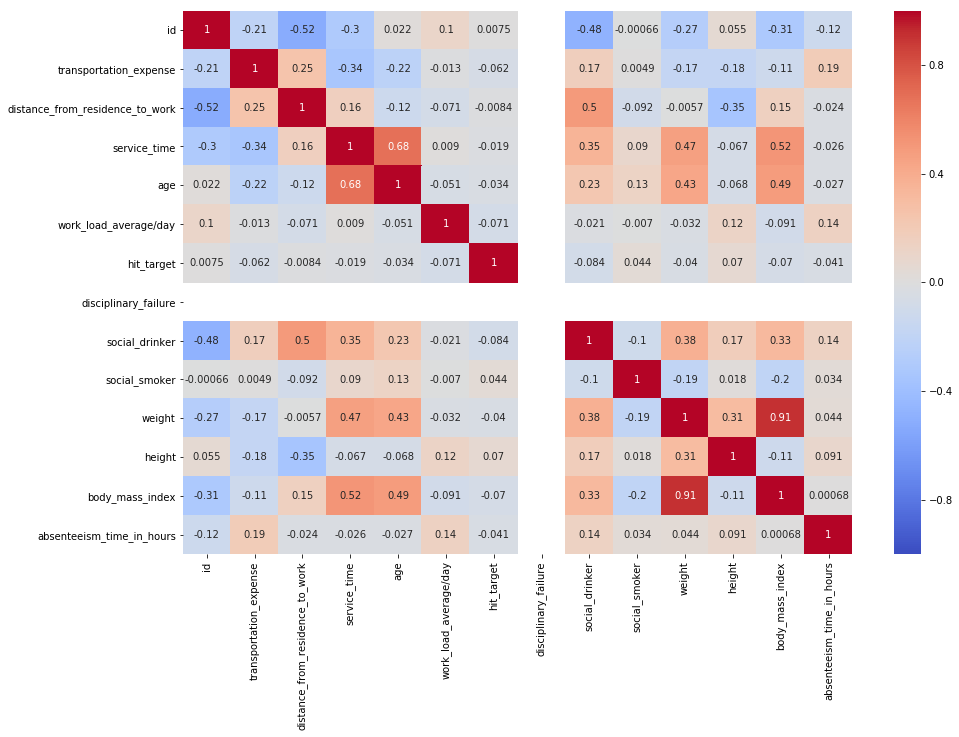

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)
plt.show()

In [122]:
from sklearn.linear_model import LinearRegression

cols = list(df.columns)
X = df.loc[:,cols[1:-1]]
Y = df.loc[:,cols[-1:]]
lr = LinearRegression(normalize=True)
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [125]:
lr.coef_
#lr.intercept_

array([[-2.48130291e-01, -8.75800208e-02, -1.45686953e-01,
        -6.12293100e-03,  8.84958504e-03, -2.72150980e-02,
        -2.96480215e-02, -6.93830122e-02,  8.83239222e-03,
        -5.37445162e-02, -1.42108547e-13,  2.41994341e-01,
         2.87779793e-01,  2.01886727e+00,  9.02556540e-01,
        -2.55943541e-01,  2.21270323e-01, -2.12842236e-01,
        -5.45536200e-01]])